In [1]:
from datasets import load_dataset
# legal judgment prediction
dataset = load_dataset("lawcompany/KLAID", 'ljp')

# KLAID 는 테스트용으로만 사용하였다

### 데이터 탐색 (EDA)

In [2]:
dataset = dataset['train']
dataset

Dataset({
    features: ['laws_service_id', 'fact', 'laws_service'],
    num_rows: 161192
})

In [3]:
ds = dataset.to_pandas()

ds.head(5)

,laws_service_id,fact,laws_service
0,32,피고인은 2018. 8. 9. 23:33경 술을 마신 상태로 경산시 사동에 있는 상...,"도로교통법 제148조의2 제2항,도로교통법 제44조 제2항"
1,0,피고인은 2016. 3. 19. 10:16경 경북 칠곡군 왜관읍 왜관대교 앞 도로에...,"도로교통법 제152조 제1호,도로교통법 제43조"
2,0,피고인은 2016. 10. 10 16:55경 평택시 오성면 복합화력발전소 앞 도로에...,"도로교통법 제152조 제1호,도로교통법 제43조"
3,34,피고인 A은 노동일에 종사 중이다. 피고인은 2017. 2. 2. 20:00경 부산...,형법 제260조 제1항
4,11,피고인은 2015. 7. 2. 06:35경 부산 부산진구 B에 있는 C슈퍼 앞길에서...,형법 제314조 제1항


## **'형법'만 있는 행 데이터만 선택**

In [4]:
ds = dataset.to_pandas()

ds_only_criminal = ds[ds['laws_service'].apply(lambda lst : all(law.startswith("형법") for law in lst.split(',')))]

ds_only_criminal

,laws_service_id,fact,laws_service
3,34,피고인 A은 노동일에 종사 중이다. 피고인은 2017. 2. 2. 20:00경 부산...,형법 제260조 제1항
4,11,피고인은 2015. 7. 2. 06:35경 부산 부산진구 B에 있는 C슈퍼 앞길에서...,형법 제314조 제1항
5,88,피고인은 2014. 12. 23. 18:00경 서울 구로구 C에 있는 피해자 D이 ...,"형법 제332조,형법 제329조"
7,4,피고인은 2019. 2. 25. 12:10경 전주시 덕진구 B에 있는 C에서 피해자...,형법 제257조 제1항
8,45,피고인은 2014. 7. 9. 13:50경 광주 서구 무진대로 957 씨엘병원 앞 ...,형법 제245조
...,...,...,...
161186,3,피고인은 2010. 3. 초순경 논산시 C에서 요양병원 신축공사를 진행하다 자금난에...,형법 제156조
161187,46,피고인은 구리시 C에 있는 D부동산을 운영하면서 ‘E상가조합’을 결성하여 위 상가조...,"형법 제356조,형법 제355조 제1항"
161188,34,"피고인은 2015. 4. 16. 15:16경 대구 달서구 C에 있는 D 주유소에서,...",형법 제260조 제1항
161190,1,피고인은 2011. 3. 15. 18:30경 서울 서초구 B에 있는 전 배우자인 C...,형법 제136조 제1항


문장과 조항이 1대1로 행데이터를 구성하도록 포맷팅

In [ ]:
ds_one_on_one = ds_only_criminal.copy(deep=True)
ds_one_on_one['laws_service'] = ds_one_on_one['laws_service'].apply(lambda lst : lst.split(",")[0]) # 첫번째 조항 사용, 나머지 버림

ds_one_on_one.head(5)

,laws_service_id,fact,laws_service
3,34,피고인 A은 노동일에 종사 중이다. 피고인은 2017. 2. 2. 20:00경 부산...,형법 제260조 제1항
4,11,피고인은 2015. 7. 2. 06:35경 부산 부산진구 B에 있는 C슈퍼 앞길에서...,형법 제314조 제1항
5,88,피고인은 2014. 12. 23. 18:00경 서울 구로구 C에 있는 피해자 D이 ...,형법 제332조
7,4,피고인은 2019. 2. 25. 12:10경 전주시 덕진구 B에 있는 C에서 피해자...,형법 제257조 제1항
8,45,피고인은 2014. 7. 9. 13:50경 광주 서구 무진대로 957 씨엘병원 앞 ...,형법 제245조


In [6]:
import pandas as pd
def count_laws(df : pd.DataFrame):
  counts = {}
  for i, data in df.iterrows():
    for law in data['laws_service'].split(','):
      if law in counts:
        counts[law] += 1
      else:
        counts[law] = 1
        
  return counts

In [7]:
multi_count = count_laws(ds_only_criminal)

In [8]:
single_count = count_laws(ds_one_on_one)

In [9]:
def count_filter(law_count : dict, k:int):
  counts = dict({})
  for law, count in law_count.items():
    if count >= k:
      counts[law] = count
  return counts

In [10]:
multi_count_k_10 = count_filter(multi_count, 10)
print(len(multi_count_k_10))
multi_count_k_10

68


{'형법 제260조 제1항': 10224,
 '형법 제314조 제1항': 5927,
 '형법 제332조': 379,
 '형법 제329조': 6442,
 '형법 제257조 제1항': 19406,
 '형법 제245조': 1258,
 '형법 제362조 제1항': 240,
 '형법 제284조': 2438,
 '형법 제283조 제2항': 48,
 '형법 제283조 제1항': 3106,
 '형법 제261조': 1645,
 '형법 제366조': 5136,
 '형법 제319조 제1항': 1933,
 '형법 제347조 제1항': 12278,
 '형법 제355조 제1항': 4221,
 '형법 제323조': 964,
 '형법 제136조 제1항': 11615,
 '형법 제299조': 568,
 '형법 제298조': 2971,
 '형법 제311조': 3771,
 '형법 제258조의2 제1항': 5945,
 '형법 제257조 제2항': 143,
 '형법 제246조 제1항': 430,
 '형법 제144조 제1항': 215,
 '형법 제262조': 549,
 '형법 제259조 제1항': 96,
 '형법 제297조': 297,
 '형법 제319조 제2항': 184,
 '형법 제152조 제1항': 435,
 '형법 제330조': 1326,
 '형법 제356조': 1846,
 '형법 제185조': 531,
 '형법 제307조 제2항': 686,
 '형법 제268조': 504,
 '형법 제355조 제2항': 548,
 '형법 제264조': 112,
 '형법 제331조 제2항': 479,
 '형법 제331조 제1항': 658,
 '형법 제347조 제2항': 105,
 '형법 제156조': 929,
 '형법 제258조 제2항': 27,
 '형법 제258조 제1항': 53,
 '형법 제350조 제1항': 182,
 '형법 제360조 제1항': 363,
 '형법 제307조 제1항': 230,
 '형법 제267조': 26,
 '형법 제347조의2': 193,
 '형법 제369조 제1항': 376,
 '형

In [11]:
single_count_k_10 = count_filter(single_count, 10)
print(len(single_count_k_10))
single_count_k_10

65


{'형법 제260조 제1항': 7031,
 '형법 제314조 제1항': 5528,
 '형법 제332조': 379,
 '형법 제257조 제1항': 11751,
 '형법 제245조': 1258,
 '형법 제362조 제1항': 240,
 '형법 제284조': 2438,
 '형법 제261조': 1628,
 '형법 제366조': 3103,
 '형법 제329조': 5569,
 '형법 제319조 제1항': 1749,
 '형법 제347조 제1항': 12173,
 '형법 제355조 제1항': 2053,
 '형법 제323조': 964,
 '형법 제136조 제1항': 10265,
 '형법 제299조': 568,
 '형법 제311조': 2780,
 '형법 제258조의2 제1항': 5945,
 '형법 제257조 제2항': 89,
 '형법 제246조 제1항': 329,
 '형법 제144조 제1항': 215,
 '형법 제298조': 2511,
 '형법 제262조': 549,
 '형법 제297조': 102,
 '형법 제319조 제2항': 184,
 '형법 제152조 제1항': 435,
 '형법 제330조': 1087,
 '형법 제356조': 1846,
 '형법 제185조': 531,
 '형법 제307조 제2항': 686,
 '형법 제268조': 504,
 '형법 제355조 제2항': 322,
 '형법 제283조 제1항': 654,
 '형법 제264조': 112,
 '형법 제331조 제2항': 479,
 '형법 제347조 제2항': 105,
 '형법 제156조': 929,
 '형법 제258조 제2항': 27,
 '형법 제350조 제1항': 182,
 '형법 제360조 제1항': 363,
 '형법 제307조 제1항': 230,
 '형법 제331조 제1항': 179,
 '형법 제267조': 26,
 '형법 제347조의2': 153,
 '형법 제369조 제1항': 376,
 '형법 제357조 제2항': 25,
 '형법 제259조 제1항': 42,
 '형법 제170조 제1항': 56,
 '형법 제

## 10개 랜덤샘플링

In [12]:
ds_one_on_one.head(10)

,laws_service_id,fact,laws_service
3,34,피고인 A은 노동일에 종사 중이다. 피고인은 2017. 2. 2. 20:00경 부산...,형법 제260조 제1항
4,11,피고인은 2015. 7. 2. 06:35경 부산 부산진구 B에 있는 C슈퍼 앞길에서...,형법 제314조 제1항
5,88,피고인은 2014. 12. 23. 18:00경 서울 구로구 C에 있는 피해자 D이 ...,형법 제332조
7,4,피고인은 2019. 2. 25. 12:10경 전주시 덕진구 B에 있는 C에서 피해자...,형법 제257조 제1항
8,45,피고인은 2014. 7. 9. 13:50경 광주 서구 무진대로 957 씨엘병원 앞 ...,형법 제245조
13,114,피고인은 2013. 5. 하순 22:00경 대구 달성군 B아파트 앞 길에서 C으로부...,형법 제362조 제1항
15,156,"피고인은 피해자 B(여, 71세)의 아들이다. 피고인은 2021. 10. 19. 1...",형법 제284조
16,4,피고인은 2015. 4. 2. 07:20경 광주교도소 B실에서 함께 아침식사를 하던...,형법 제257조 제1항
19,37,피고인은 2017. 12. 18. 03:35경 인천 계양구 C 소재 피해자 D(51...,형법 제261조
20,34,피고인은 2019. 7. 3. 17:25경 부산 사상구 B에 있는 ‘C미용실’ 안에...,형법 제260조 제1항


Dataframe -> dict

In [13]:
def to_cls_dict(df: pd.DataFrame, min_samples_per_class: int = 0) -> dict[str, list[str]]:
    cls_dict = {}

    # 그룹핑
    for _, row in df.iterrows():
        label = row['laws_service']
        fact = row['fact']
        cls_dict.setdefault(label, []).append(fact)

    # 필터링
    if min_samples_per_class > 0:
        cls_dict = {
            label: facts
            for label, facts in cls_dict.items()
            if len(facts) >= min_samples_per_class
        }

    return cls_dict

In [14]:
cls_dict = to_cls_dict(ds_one_on_one, 10)

print(len(cls_dict))
for k in cls_dict.keys():
    print(f"{k} : {len(cls_dict[k])}")

65
형법 제260조 제1항 : 7031
형법 제314조 제1항 : 5528
형법 제332조 : 379
형법 제257조 제1항 : 11751
형법 제245조 : 1258
형법 제362조 제1항 : 240
형법 제284조 : 2438
형법 제261조 : 1628
형법 제366조 : 3103
형법 제329조 : 5569
형법 제319조 제1항 : 1749
형법 제347조 제1항 : 12173
형법 제355조 제1항 : 2053
형법 제323조 : 964
형법 제136조 제1항 : 10265
형법 제299조 : 568
형법 제311조 : 2780
형법 제258조의2 제1항 : 5945
형법 제257조 제2항 : 89
형법 제246조 제1항 : 329
형법 제144조 제1항 : 215
형법 제298조 : 2511
형법 제262조 : 549
형법 제297조 : 102
형법 제319조 제2항 : 184
형법 제152조 제1항 : 435
형법 제330조 : 1087
형법 제356조 : 1846
형법 제185조 : 531
형법 제307조 제2항 : 686
형법 제268조 : 504
형법 제355조 제2항 : 322
형법 제283조 제1항 : 654
형법 제264조 : 112
형법 제331조 제2항 : 479
형법 제347조 제2항 : 105
형법 제156조 : 929
형법 제258조 제2항 : 27
형법 제350조 제1항 : 182
형법 제360조 제1항 : 363
형법 제307조 제1항 : 230
형법 제331조 제1항 : 179
형법 제267조 : 26
형법 제347조의2 : 153
형법 제369조 제1항 : 376
형법 제357조 제2항 : 25
형법 제259조 제1항 : 42
형법 제170조 제1항 : 56
형법 제337조 : 45
형법 제266조 제1항 : 281
형법 제246조 제2항 : 101
형법 제334조 제2항 : 70
형법 제335조 : 27
형법 제297조의2 : 41
형법 제258조 제1항 : 26
형법 제164조 제1항 : 111
형법 제301조 :

단순 시각화

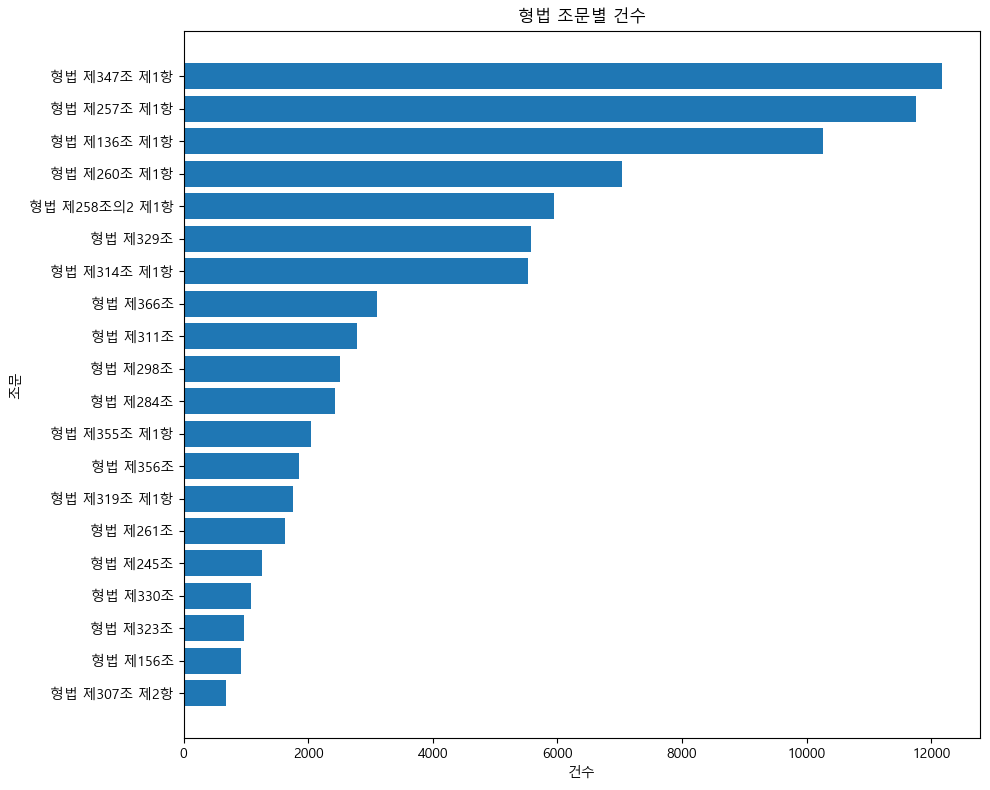

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우 예시)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 (조문 : 건수)
data = {
    "형법 제260조 제1항": 7031,
    "형법 제314조 제1항": 5528,
    "형법 제332조": 379,
    "형법 제257조 제1항": 11751,
    "형법 제245조": 1258,
    "형법 제362조 제1항": 240,
    "형법 제284조": 2438,
    "형법 제261조": 1628,
    "형법 제366조": 3103,
    "형법 제329조": 5569,
    "형법 제319조 제1항": 1749,
    "형법 제347조 제1항": 12173,
    "형법 제355조 제1항": 2053,
    "형법 제323조": 964,
    "형법 제136조 제1항": 10265,
    "형법 제299조": 568,
    "형법 제311조": 2780,
    "형법 제258조의2 제1항": 5945,
    "형법 제257조 제2항": 89,
    "형법 제246조 제1항": 329,
    "형법 제144조 제1항": 215,
    "형법 제298조": 2511,
    "형법 제262조": 549,
    "형법 제297조": 102,
    "형법 제319조 제2항": 184,
    "형법 제152조 제1항": 435,
    "형법 제330조": 1087,
    "형법 제356조": 1846,
    "형법 제185조": 531,
    "형법 제307조 제2항": 686,
    "형법 제268조": 504,
    "형법 제355조 제2항": 322,
    "형법 제283조 제1항": 654,
    "형법 제264조": 112,
    "형법 제331조 제2항": 479,
    "형법 제347조 제2항": 105,
    "형법 제156조": 929,
    "형법 제258조 제2항": 27,
    "형법 제350조 제1항": 182,
    "형법 제360조 제1항": 363,
    "형법 제307조 제1항": 230,
    "형법 제331조 제1항": 179,
    "형법 제267조": 26,
    "형법 제347조의2": 153,
    "형법 제369조 제1항": 376,
    "형법 제357조 제2항": 25,
    "형법 제259조 제1항": 42,
    "형법 제170조 제1항": 56,
    "형법 제337조": 45,
    "형법 제266조 제1항": 281,
    "형법 제246조 제2항": 101,
    "형법 제334조 제2항": 70,
    "형법 제335조": 27,
    "형법 제297조의2": 41,
    "형법 제258조 제1항": 26,
    "형법 제164조 제1항": 111,
    "형법 제301조": 128,
    "형법 제357조 제1항": 56,
    "형법 제151조 제1항": 112,
    "형법 제333조": 48,
    "형법 제348조 제1항": 40,
    "형법 제260조 제2항": 36,
    "형법 제285조": 14,
    "형법 제331조의2": 32,
    "형법 제305조 제1항": 23
}

# 정렬 (건수 내림차순)
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# 조문, 건수 리스트
labels = list(sorted_data.keys())[:20]
counts = list(sorted_data.values())[:20]

# 그래프 크기 조절 (조문이 많으니 크게 설정)
plt.figure(figsize=(10, 8))

# 막대 그래프
plt.barh(labels, counts)

# y축 뒤집기 (큰 값이 위에 오도록)
plt.gca().invert_yaxis()

# 제목, 라벨
plt.title('형법 조문별 건수')
plt.xlabel('건수')
plt.ylabel('조문')

# 레이아웃 조정
plt.tight_layout()

# 출력
plt.show()


랜덤 샘플링

In [15]:
import random

def rand_sample_dict(cls_dict, k, seed):
    random.seed(seed)
    rand_k_cls_dict = {}
    for cls in cls_dict.keys():
        rand_k_cls_dict[cls] = random.sample(cls_dict[cls], k)

    return rand_k_cls_dict

In [16]:
rand_10_cls_dict = rand_sample_dict(cls_dict, 10, 613)

In [17]:
for k, v in rand_10_cls_dict.items():
    print(f"{k} : {len(v)}")

형법 제260조 제1항 : 10
형법 제314조 제1항 : 10
형법 제332조 : 10
형법 제257조 제1항 : 10
형법 제245조 : 10
형법 제362조 제1항 : 10
형법 제284조 : 10
형법 제261조 : 10
형법 제366조 : 10
형법 제329조 : 10
형법 제319조 제1항 : 10
형법 제347조 제1항 : 10
형법 제355조 제1항 : 10
형법 제323조 : 10
형법 제136조 제1항 : 10
형법 제299조 : 10
형법 제311조 : 10
형법 제258조의2 제1항 : 10
형법 제257조 제2항 : 10
형법 제246조 제1항 : 10
형법 제144조 제1항 : 10
형법 제298조 : 10
형법 제262조 : 10
형법 제297조 : 10
형법 제319조 제2항 : 10
형법 제152조 제1항 : 10
형법 제330조 : 10
형법 제356조 : 10
형법 제185조 : 10
형법 제307조 제2항 : 10
형법 제268조 : 10
형법 제355조 제2항 : 10
형법 제283조 제1항 : 10
형법 제264조 : 10
형법 제331조 제2항 : 10
형법 제347조 제2항 : 10
형법 제156조 : 10
형법 제258조 제2항 : 10
형법 제350조 제1항 : 10
형법 제360조 제1항 : 10
형법 제307조 제1항 : 10
형법 제331조 제1항 : 10
형법 제267조 : 10
형법 제347조의2 : 10
형법 제369조 제1항 : 10
형법 제357조 제2항 : 10
형법 제259조 제1항 : 10
형법 제170조 제1항 : 10
형법 제337조 : 10
형법 제266조 제1항 : 10
형법 제246조 제2항 : 10
형법 제334조 제2항 : 10
형법 제335조 : 10
형법 제297조의2 : 10
형법 제258조 제1항 : 10
형법 제164조 제1항 : 10
형법 제301조 : 10
형법 제357조 제1항 : 10
형법 제151조 제1항 : 10
형법 제333조 : 10
형법 제348조 제1항 :

In [18]:
rand_10_cls_dict["형법 제185조"]

['피고인의 방어권 행사에 실질적인 불이익을 초래하지 않는 범위 내에서 공소사실을 일부 수정하였다. 피고인은 B이 운영하는 경기 가평군 C펜션으로 진입하는 D 도로에 자신의 토지 일부가 포함되어 있고, 경계측량 후 경계지점에 설치한 펜스를 B이 뽑아 버렸다는 이유로 화가 나서 2018. 6. 22.경부터 2018. 8. 14.경까지 자신 소유 E 체어맨 차량을 위 도로 위에 주차를 시켜 놓고 이동시키지 아니함으로써 불특정 다수인의 차량통행을 현저히 곤란하게 하였다. 이로써 피고인은 일반 공중이 자유로이 통행하는 육로의 통행을 방해하였다.',
 '피고인은 한국중부발전 주식회사 B본부 제1발전소 전기기술팀에 근무하는 사람이고, C은 위 B본부 제3발전소 발전운영실, D는 위 B본부 직할 안전품질실에 근무하는 사람으로 피고인과 C, D는 전국민주노동조합총연맹(이하 민노총) 공공운수연맹 한국발전노조 중부발전본부 B지부의 노조원들이다. 누구든지 육로, 수로 또는 교량을 손괴 또는 불통하게 하거나 기타 방법으로 교통을 방해하여서는 아니된다. 그럼에도 불구하고 피고인은 C, D와 함께 2015. 11. 14. 16:50경부터 18:00경까지 사이에 서울 종로구 종각 서린로터리(광화문) 방향 도로에서 전 차로를 점거한 채 구호를 제창하면서 위 도로를 행진하였다. 이로써 피고인은, C, D, 집회참가자들과 공모하여 위 전 차로의 교통을 방해하였다.',
 '피고인은 B(공동운영위원장 C)가 D 19:00경부터 같은 날 21:10경까지 서울 중구 서울광장에서 주최한 ‘E’ 미신고집회에 참가하였다. 피고인을 포함한 집회참가자 10,000여명은 집회 종료 후 ‘F’는 피켓과 같은 내용의 구호를 제창하면서 청와대 방면으로 진출하기 위해 태평로 10차로 전 차로를 점거한 채 미신고 행진하다가 서울 중구 파이낸스 빌딩 앞에서 경찰 차벽 등에 의해 행진이 차단되자, 집회참가자 7,000여명은 같은 날 21:35경부터 청계남로를 이용하여 광교로터리   청계2가 로터리   청계3가 로터리   

#### 테스트 데이터셋 (KLAID 데이터셋)과 파인튜닝 데이터셋 (GPT4.1 문장생성) 쿼리 교집합 및 차집합 탐색

In [ ]:
law_path = "../data/queries.jsonl"
law_subset_path = "../data/queries-edited.jsonl"

laws = load_dataset('json', data_files=law_path)['train'].to_pandas()
laws_subset = load_dataset('json', data_files=law_subset_path)['train']

law_subset_names = laws_subset['title']
law_subset_names

['형법 제87조',
 '형법 제87조 제1호',
 '형법 제87조 제2호',
 '형법 제87조 제3호',
 '형법 제88조',
 '형법 제91조 제1호',
 '형법 제91조 제2호',
 '형법 제92조',
 '형법 제93조',
 '형법 제94조 제1항',
 '형법 제94조 제2항',
 '형법 제95조 제1항',
 '형법 제95조 제2항',
 '형법 제96조',
 '형법 제97조',
 '형법 제98조 제1항',
 '형법 제98조 제2항',
 '형법 제99조',
 '형법 제102조',
 '형법 제103조',
 '형법 제103조 제1항',
 '형법 제103조 제2항',
 '형법 제104조',
 '형법 제105조',
 '형법 제106조',
 '형법 제107조 제1항',
 '형법 제107조 제2항',
 '형법 제108조 제1항',
 '형법 제108조 제2항',
 '형법 제109조',
 '형법 제110조',
 '형법 제111조 제1항',
 '형법 제112조',
 '형법 제113조 제1항',
 '형법 제113조 제2항',
 '형법 제114조',
 '형법 제115조',
 '형법 제116조',
 '형법 제116조의2 제1항',
 '형법 제116조의3',
 '형법 제117조 제1항',
 '형법 제117조 제2항',
 '형법 제118조',
 '형법 제119조 제1항',
 '형법 제119조 제2항',
 '형법 제121조',
 '형법 제122조',
 '형법 제123조',
 '형법 제124조',
 '형법 제124조 제1항',
 '형법 제125조',
 '형법 제126조',
 '형법 제127조',
 '형법 제128조',
 '형법 제129조 제1항',
 '형법 제129조 제2항',
 '형법 제130조',
 '형법 제131조 제1항',
 '형법 제131조 제2항',
 '형법 제131조 제3항',
 '형법 제131조 제4항',
 '형법 제132조',
 '형법 제133조 제1항',
 '형법 제133조 제2항',
 '형법 제134조',
 '형법 제135조',
 '형법 제136조 제1항',
 '형

In [ ]:
print("<<누락>>\n") # 형법 762개 조항 (조,항,호) 중 하나이나, 학습에 사용될 조항에는 포함되지 않는 경우

for law in rand_10_cls_dict.keys():
  if law not in law_subset_names:
    print(law)
    print(laws.loc[laws['title'] == law]['content'])

<<누락>>

형법 제332조
688    제332조(상습범) 상습으로 제329조 내지 제331조의2의 죄를 범한 자는 그 죄...
Name: content, dtype: object
형법 제264조
545    제264조(상습범) 상습으로 제257조 제258조 제258조의2 제260조 또는 제...
Name: content, dtype: object
형법 제285조
591    제285조(상습범) 상습으로 제283조제1항 제2항 또는 전조의 죄를 범한 때에는 ...
Name: content, dtype: object


## 저장

In [ ]:
from datasets import Dataset

law_path = "../dataset/preprocessing/queries.jsonl"
law = load_dataset('json', data_files=law_path)['train']

# ID 를 맞춰주기 위한 helper method
def mapper(
    keyword,
    law: Dataset,
):
    df_law = law.to_pandas()
    # 검색
    matched = df_law.loc[df_law["title"] == keyword]

    if not matched.empty:
        id = str(matched.index[0])
        text = matched["content"].iloc[0]
        return id, text
    else:
        raise ValueError(f"No results were found for the keyword {keyword}")
    
queries = []
corpus = []
qrels = []

# 변환
corpus_id = 0
for key in sorted(rand_10_cls_dict.keys()):
    law_id, law_text = mapper(key, law)
    # queries
    queries.append({'id':str(law_id), 'text':law_text})
    
    items = rand_10_cls_dict[key]
    for item in items:
        # corpus
        # evaluation.py 의 search 메서드 내부 로직상 list 지만 하나의 원소만 저장해야 함
        corpus.append({'id':str(corpus_id), 'text':[item]})
        # qrels
        qrels.append({'qid':str(law_id), 'docid':str(corpus_id), 'relevance': 1})
        corpus_id+=1

# 저장
save_dir = "../dataset/test"
import os
import json

# Queries
with open(os.path.join(save_dir, "KLAID_test_queries_k10.jsonl"), "w", encoding="utf-8") as f:
    for q in queries:
        json.dump(q, f, ensure_ascii=False)
        f.write("\n")
# Corpus
with open(os.path.join(save_dir, "KLAID_test_corpus_k10.jsonl"), "w", encoding="utf-8") as f:
    for c in corpus:
        json.dump(c, f, ensure_ascii=False)
        f.write("\n")
# Qrels
with open(os.path.join(save_dir, "KLAID_test_qrels_k10.jsonl"), "w", encoding="utf-8") as f:
    for r in qrels:
        json.dump(r, f, ensure_ascii=False)
        f.write("\n")

In [ ]:
"""
klaid_test_queries_k10
(
    id:str, 
    text:str, 
)
klaid_test_corpus_k10
(
    id:str, 
    text:list[str], 
)
klaid_test_qrels_k10
(
    qid:str, 
    docid:str, 
    relevance: float(0 to 1),
)
"""